In [171]:
# preliminaries
%matplotlib widget
import numpy as np
import scipy as sp
import pandas as pd
import scipy.optimize
import pysces
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()

QUESTION 1 PART A

In [221]:
sr0 = pd.read_csv('A0B0.csv',sep=',', names=['Time', 'concentration'])
s1 = pd.read_csv('A0.5B24.csv', sep=',',  names=['Time', 'concentration'])
s2 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'concentration'])
s3 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'concentration'])
s4 = pd.read_csv('A4B24.csv', sep=',',names=['Time', 'concentration'])
s5 = pd.read_csv('A8B24.csv', sep=',',names=['Time', 'concentration'])

<Axes: xlabel='Time', ylabel='concentration'>

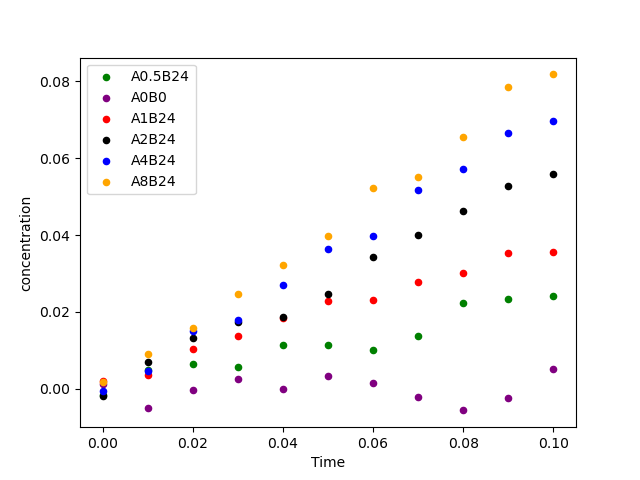

In [226]:

ax=s1.plot(x='Time', y='concentration', kind='scatter',label='A0.5B24', color='green')
sr0.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A0B0', color='purple')
s2.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A1B24', color='red')
s3.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A2B24', color='black')
s4.plot(ax=ax, x='Time', y='concentration', kind='scatter', label='A4B24', color='blue')
s5.plot(ax=ax, x='Time', y='concentration', kind='scatter', label='A8B24', color='orange')

QUESTION 1 PART B

In [223]:
sr0 = pd.read_csv('A0B0.csv',sep=',', names=['Time', 'concentration'])
r1 = pd.read_csv('A8B1.5.csv',  names=['Time', 'concentration'])
r2 = pd.read_csv('A8B3.csv',  names=['Time', 'concentration'])
r3 = pd.read_csv('A8B6.csv', names=['Time', 'concentration'])
r4 = pd.read_csv('A8B12.csv',  names=['Time', 'concentration'])
r5 = pd.read_csv('A8B24.csv', names=['Time', 'concentration'])

<Axes: xlabel='Time', ylabel='concentration'>

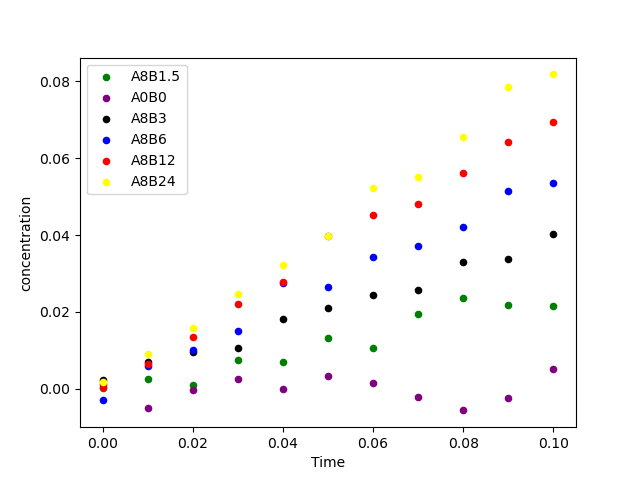

In [224]:
ax=r1.plot(x='Time', y='concentration', kind='scatter',label='A8B1.5', color='green')
sr0.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A0B0', color='purple')
r2.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A8B3', color='black')
r3.plot(ax=ax, x='Time', y='concentration', kind='scatter', label='A8B6', color='blue')
r4.plot(ax=ax, x='Time', y='concentration', kind='scatter',label='A8B12', color='red')
r5.plot(ax=ax, x='Time', y='concentration', kind='scatter', label='A8B24', color='yellow')


QUESTION 2

In [176]:
sr0 = pd.read_csv('A0B0.csv',sep=',', names=['Time', 'concentration'])
s1 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'concentration'])
s2 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'concentration'])
s3 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'concentration'])
s4 = pd.read_csv('A4B24.csv',sep=',', names=['Time', 'concentration'])
r1 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'concentration'])
r2 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'concentration'])
r3 = pd.read_csv('A8B6.csv', sep=',',names=['Time', 'concentration'])
r4 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'concentration'])
r5 = pd.read_csv('A8B24.csv', sep=',',names=['Time', 'concentration'])

In [177]:
reg0 = sp.stats.linregress(sr0)
reg1 = sp.stats.linregress(s0) # regression for obtaining slope,intercept:  intial depoendent variable , 
reg2 = sp.stats.linregress(s1)
reg3 = sp.stats.linregress(s2)
reg4 = sp.stats.linregress(s4)
reg5 = sp.stats.linregress(r1)
reg6 = sp.stats.linregress(r2)
reg7 = sp.stats.linregress(r3)
reg8 = sp.stats.linregress(r4)
reg9 = sp.stats.linregress(r5)


In [178]:
regressions = [reg0, reg1, reg2, reg3, reg4, reg5]
ratesA = []
for reg in regressions:
    print(reg.slope)
    ratesA.append(reg.slope)
ratesA = np.array(ratesA)

0.004954646341627726
0.24118661159479945
0.24118661159479945
0.3526304449083254
0.7322856639928835
0.25422083243133853


In [179]:
regressions = [reg0,reg5, reg6, reg7, reg8, reg9]
ratesB = []
for reg in regressions:
    print(reg.slope)
    ratesB.append(reg.slope)
ratesB = np.array(ratesB)

0.004954646341627726
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [180]:
A=np.array([0, 0.5, 1, 2, 4, 8])

In [181]:
B=np.array([0, 1.5, 3, 6, 12, 24])

In [182]:
A2 = pd.DataFrame({'a': A, 'rate': ratesA})

In [183]:
B2 = pd.DataFrame({'b': B, 'rate': ratesB})

In [184]:
A2['b'] = 24

In [185]:
B2['a'] = 8

In [186]:
df = pd.concat([A2, B2])

In [187]:
df

a      rate     b
0  0.0  0.004955  24.0
1  0.5  0.241187  24.0
2  1.0  0.241187  24.0
3  2.0  0.352630  24.0
4  4.0  0.732286  24.0
5  8.0  0.254221  24.0
0  8.0  0.004955   0.0
1  8.0  0.254221   1.5
2  8.0  0.367954   3.0
3  8.0  0.556409   6.0
4  8.0  0.701204  12.0
5  8.0  0.825079  24.0

QUESTION 4

In [188]:
def vtot(a, b, vf, ka, kb):
    return (vf*a*b)/((ka+a)*(kb+b))

In [189]:
from lmfit import Model
mymod = Model(vtot, independent_vars=['a', 'b'])
mypar  = mymod.make_params(vf=1, ka=1, kb=1)

In [190]:
myfit = mymod.fit(df.rate, mypar, a=df.a, b=df.b)

In [191]:
myfit

In [197]:
#error estimate of vf=29.18%
#error estimate of ka=87.53%
#error estimate of kb=88.95%

QUESTION 5

Rate VS a

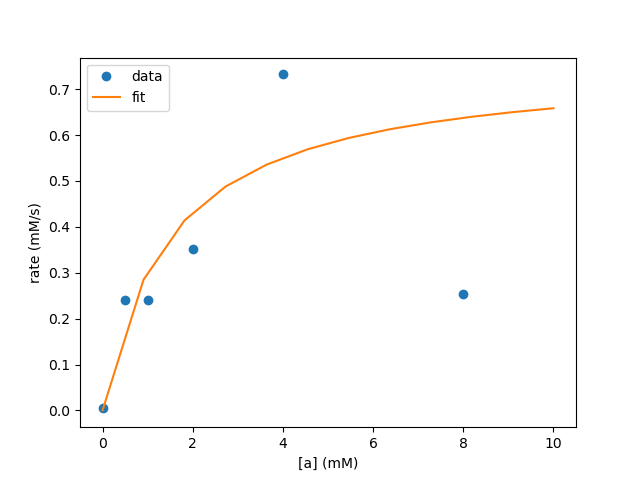

In [218]:
range = np.linspace(0,10,12)
fig, ax = plt.subplots()
ax.plot(A2.a, A2.rate, 'o', label='data') 
ax.plot(range, myfit.eval(a=range, b=24), label='fit') 
ax.set_xlabel('[a] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')

Rate vs b

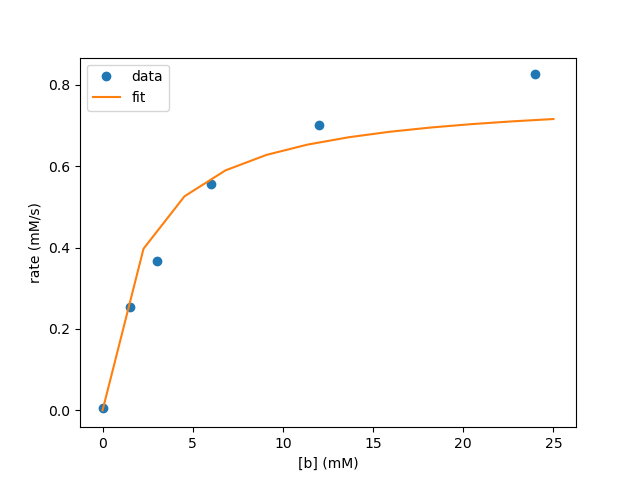

In [219]:
range2 = np.linspace(0,25,12)
fig, bx = plt.subplots()
bx.plot(B2.b, B2.rate, 'o', label='data') 
bx.plot(range2, myfit.eval(a=24 ,b=range2), label='fit') 
bx.set_xlabel('[b] (mM)')
bx.set_ylabel('rate (mM/s)')
bx.legend(loc='best')